Descrever como foram coletados/gerados todos os dados utilizados no projeto e organizá-los em tabelas, quando possível. 

Fazer gráficos de dispersão e histograma. 

Calcular R2.

Fazer o blox-plot para remover os outliers.

Aplicar testes de aderência (Chi-quadrado ou K-S), etc.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import chi
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import chisquare
import pandas as pd

In [2]:
def kolmogorov_smirnov_critico(n):
    # table of critical values for the kolmogorov-smirnov test - 95% confidence
    # Source: https://www.soest.hawaii.edu/GG/FACULTY/ITO/GG413/K_S_Table_one_Sample.pdf
    # Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
    # alpha = 0.05 (95% confidential level) 
    if n <= 40:
        # valores entre 1 e 40
        kolmogorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342, 0.45427, 0.43001, 0.40925, 
                      0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936, 0.30143, 0.29408, 
                      0.28724, 0.28087, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 0.24170, 
                      0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826, 0.21544, 0.21273, 0.21012]
        ks_critico = kolmogorov_critico[n - 1]
    elif n > 40:
        # valores acima de 40:
        kolmogorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolmogorov_critico
    else:
        pass            
            
    return ks_critico
def teste_hipoteses(ks,n):
    ks_crit = kolmogorov_smirnov_critico(n)
    if ks_crit> ks:
        print('Distribuição é a passada como entrada')
    else:
        print('Distribuição não é a passada como entrada')

# Horário: 11-12h -> 150 pessoas

Criação da curva da distribuição exponencial

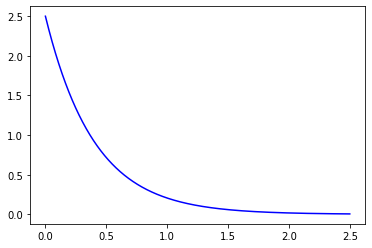

In [3]:
X = np.linspace(0,2.5,1000)
lam = 2.5
f = lam*np.exp(-1*lam*X)
plt.plot(X,f,color='blue')

Criação dos números aleatórios que seguem uma distribuição exponencial, assim como construção do histograma com esses dados

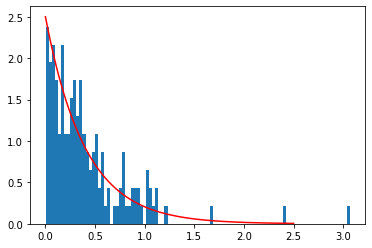

In [4]:
bins = 100
lam = 2.5
beta = 1/lam
e = np.random.exponential(scale = beta, size = 151)
plt.hist(e,bins,density = True)
bin = np.linspace(0,2.5,1000)
y = (1/beta)*np.exp(-1*bin/beta)
plt.plot(bin,y,color = 'red')

Teste Chi-quadrado para uma distribuição uniforme
Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [5]:
chisquare(e)

Power_divergenceResult(statistic=64.16723815360146, pvalue=0.9999999999244511)

Realização do teste de Kolmogorov Smirnov

In [6]:
param = stats.expon.fit(e)
ks, p_value = stats.kstest(e, lambda e : stats.expon.cdf(e, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(e))

0.04769399223192489
0.8656768802113264
Distribuição é a passada como entrada


Criação do diagrama de dispersão dos dados gerados

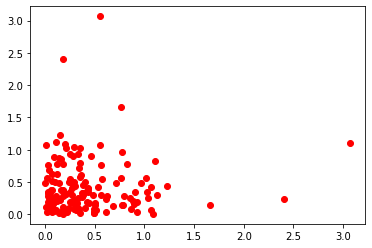

In [7]:
ey = []
j=1
while j <= 150:
    ey.append(e[j])
    j+=1
e = np.resize(e, e.size - 1)
plt.scatter(e,ey,color = 'r')

Criação do Box-plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0cc88c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0cc88caf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0cc871ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0cc897250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0cc8975e0>],
 'means': []}

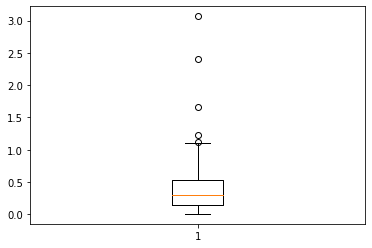

In [8]:
plt.boxplot(e)

Retirando os outliers

In [9]:
mean = np.mean(e)
standard_deviation = np.std(e)
distance_from_mean = abs(e - mean)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = e[not_outlier]

Criação do Box-plot sem outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0cc8f4a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0cc901160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0cc8f4670>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0cc901880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0cc901c10>],
 'means': []}

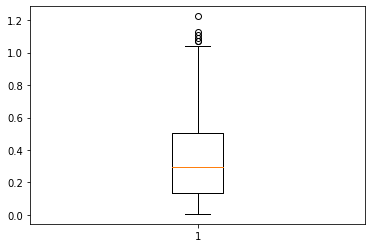

In [10]:
plt.boxplot(no_outliers)

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ei e a coluna da direita corresponde a E(i+1)

In [11]:
df1 = pd.DataFrame(e, ey)
df1.head()

,0
0.331548,0.050290
0.929103,0.331548
0.030802,0.929103
0.762551,0.030802
1.661000,0.762551


# Horário: 12-13h -> 750 pessoas

Criação da curva da distribuição exponencial

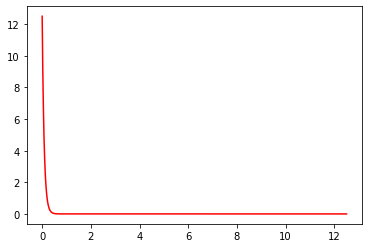

In [12]:
X = np.linspace(0,12.5,1000)
lam = 12.5
f = lam*np.exp(-1*lam*X)
plt.plot(X,f,color='red')

Criação dos números aleatórios que seguem uma distribuição exponencial, assim como construção do histograma com esses dados

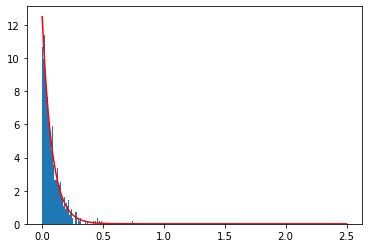

In [13]:
bins = 100
lam = 12.5
beta = 1/lam
e = np.random.exponential(scale = beta, size = 751)
plt.hist(e,bins,density = True)
bin = np.linspace(0,2.5,1000)
y = (1/beta)*np.exp(-1*bin/beta)
plt.plot(bin,y,color = 'red')

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [14]:
chisquare(e)

Power_divergenceResult(statistic=60.22337147585672, pvalue=1.0)

Realização do teste de Kolmogorov Smirnov

In [15]:
param = stats.expon.fit(e)
ks, p_value = stats.kstest(e, lambda e : stats.expon.cdf(e, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(e))

0.020326058446349812
0.9092214466360907
Distribuição é a passada como entrada


Criação do diagrama de dispersão dos dados gerados

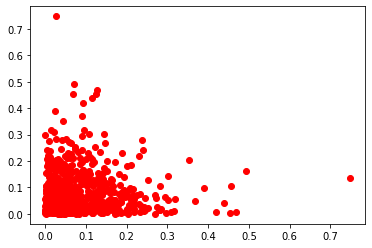

In [16]:
ey = []
j=1
while j <= 750:
    ey.append(e[j])
    j+=1
e = np.resize(e, e.size - 1)
plt.scatter(e,ey,color = 'r')

In [17]:
x = np.array(e)
y = np.array(ey)
x = x.reshape(-1,1)

linreg = LinearRegression(fit_intercept = False)
obj = linreg.fit(x,y)
pred = linreg.predict(x)
r2 = r2_score(x,y)
r2

-1.035981702610954

Criação do Box-plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0ccba0460>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ccba0b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0ccba00d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ccbab2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ccbab670>],
 'means': []}

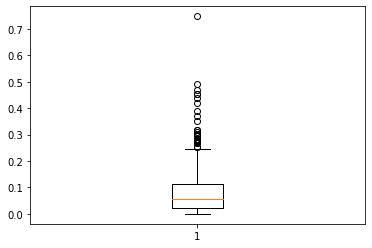

In [18]:
plt.boxplot(e)

Tratamento dos outliers

In [19]:
mean = np.mean(e)
standard_deviation = np.std(e)
distance_from_mean = abs(e - mean)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = e[not_outlier]

Box-plot sem outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0ccbfefa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ccc0e700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0ccbfebe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ccc0ee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ccc181f0>],
 'means': []}

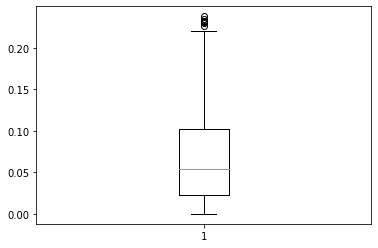

In [20]:
plt.boxplot(no_outliers)

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ei e a coluna da direita corresponde a E(i+1)

In [21]:
df2 = pd.DataFrame(e, ey)
df2.head()

,0
0.114106,0.101004
0.440151,0.114106
0.042903,0.440151
0.010270,0.042903
0.161792,0.010270


# Horário: 13-14h -> 400 pessoas

Criação da curva da distribuição exponencial

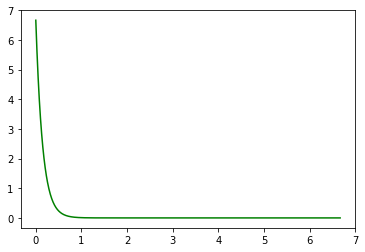

In [22]:
X = np.linspace(0,6.67,1300)
lam = 6.67
f = lam*np.exp(-1*lam*X)
plt.plot(X,f,color='green')

Geração dos dados aleatórios seguindo uma distribuição exponencial e construção do histograma desses dados

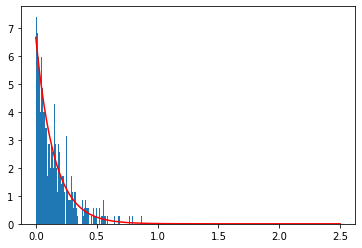

In [23]:
bins = 100
lam = 6.67
beta = 1/lam
e = np.random.exponential(scale = beta, size = 401)
plt.hist(e,bins,density = True)
bin = np.linspace(0,2.5,1000)
y = (1/beta)*np.exp(-1*bin/beta)
plt.plot(bin,y,color = 'red')

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [24]:
chisquare(e)

Power_divergenceResult(statistic=59.15344813240333, pvalue=1.0)

Realização do teste de Kolmogorov Smirnov

In [25]:
param = stats.expon.fit(e)
ks, p_value = stats.kstest(e, lambda e : stats.expon.cdf(e, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(e))

0.029006300707346222
0.8786226094340446
Distribuição é a passada como entrada


Construção do diagrama de dispersão

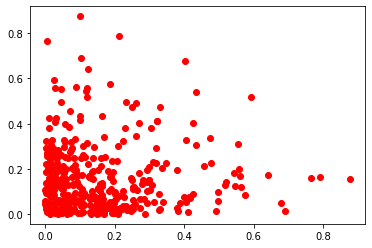

In [26]:
ey = []
j=1
while j <= 400:
    ey.append(e[j])
    j+=1
e = np.resize(e, e.size - 1)
plt.scatter(e,ey,color = 'r')

In [27]:
x = np.array(e)
y = np.array(ey)
x = x.reshape(-1,1)

linreg = LinearRegression(fit_intercept = False)
obj = linreg.fit(x,y)
pred = linreg.predict(x)
r2 = r2_score(y,pred)
r2

-0.4696766331510296

Criação do Box-plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0cde42970>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0cde4f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0cde37460>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0cde4f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0cde4fb80>],
 'means': []}

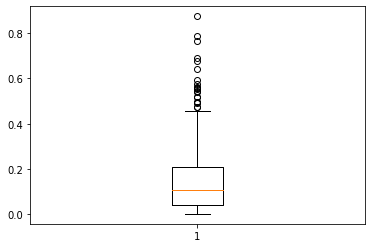

In [28]:
plt.boxplot(e)

Tratamento dos outliers

In [29]:
mean = np.mean(e)
standard_deviation = np.std(e)
distance_from_mean = abs(e - mean)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliers = e[not_outlier]

Criação do Box-plot sem os outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0cdeae2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0cdeae9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0cde9eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0cdebb130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0cdebb4c0>],
 'means': []}

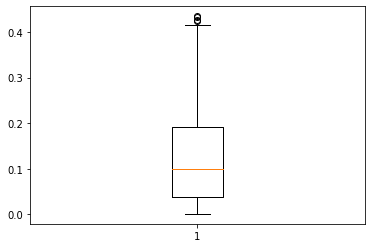

In [30]:
plt.boxplot(no_outliers)

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ei e a coluna da direita corresponde a E(i+1)

In [31]:
df3 = pd.DataFrame(e, ey)
df3.head()

,0
0.063482,0.147542
0.022122,0.063482
0.143801,0.022122
0.031565,0.143801
0.062898,0.031565


# Mesa dos onívoros

Geração dos números aleatórios com uma distribuição triangular e criação do histograma

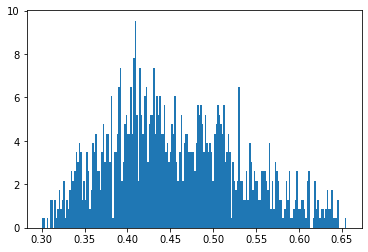

In [32]:
distribuicao = np.random.triangular(0.3, 0.41, 0.66, 1301)
h = plt.hist(distribuicao, bins=200,
             density=True)

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [33]:
chisquare(distribuicao)

Power_divergenceResult(statistic=16.642124425664633, pvalue=1.0)

Teste de Kolmogorov Smirnov

In [34]:
param = stats.triang.fit(distribuicao)
ks, p_value = stats.kstest(distribuicao, lambda distribuicao : stats.triang.cdf(distribuicao, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(distribuicao))

0.0203290414934314
0.6476985337561634
Distribuição é a passada como entrada


Box-plot dos dados gerados

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0ce113130>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ce113850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0ce0f4c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ce113f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ce11d340>],
 'means': []}

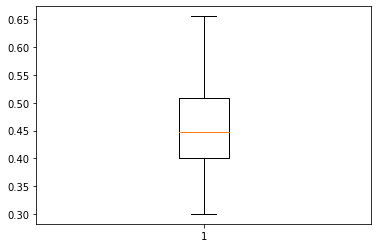

In [35]:
plt.boxplot(distribuicao)

Diagrama de dispersão dos dados gerados

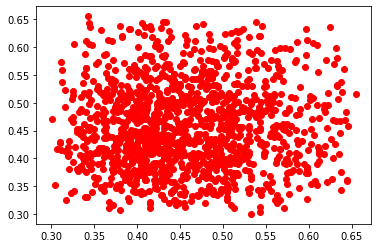

In [36]:
ey = []
j=1
while j <= 1300:
    ey.append(distribuicao[j])
    j+=1
distribuicao = np.resize(distribuicao, distribuicao.size - 1)
plt.scatter(distribuicao,ey,color = 'r')

In [37]:
x = np.array(distribuicao)
y = np.array(ey)
x = x.reshape(-1,1)

linreg = LinearRegression(fit_intercept = False)
obj = linreg.fit(x,y)
pred = linreg.predict(x)
r2 = r2_score(y,pred)
r2

-0.8936067604647087

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ti e a coluna da direita corresponde a T(i+1)

In [38]:
df4 = pd.DataFrame(distribuicao, ey)
df4.head()

,0
0.492114,0.509907
0.378868,0.492114
0.435472,0.378868
0.426824,0.435472
0.439553,0.426824


# Mesa dos vegetarianos

Geração dos números aleatórios com uma distribuição triangular e criação do histograma

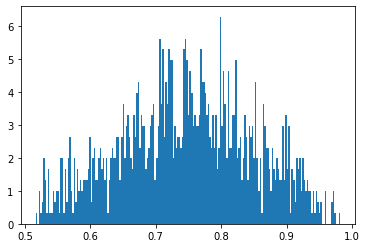

In [39]:
distribuicao = np.random.triangular(0.5, 0.75, 1, 1301)
h = plt.hist(distribuicao, bins=200,
             density=True)

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [40]:
chisquare(distribuicao)

Power_divergenceResult(statistic=18.19241517206555, pvalue=1.0)

Teste de Kolmogorov Smirnov

In [41]:
param = stats.triang.fit(distribuicao)
ks, p_value = stats.kstest(distribuicao, lambda distribuicao : stats.triang.cdf(distribuicao, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(distribuicao))

0.017973618440366157
0.7875913260077567
Distribuição é a passada como entrada


Box-plot dos dados gerados aleatoriamente

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0ce3e4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ce3f2160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0ce3e47c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ce3f2880>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ce3f2c10>],
 'means': []}

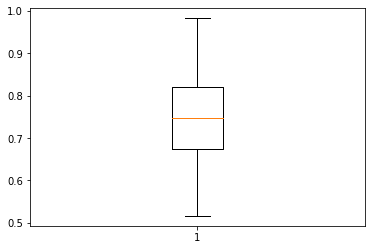

In [42]:
plt.boxplot(distribuicao)

Gráfico de dispersão

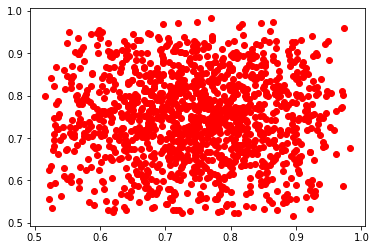

In [43]:
ey = []
j=1
while j <= 1300:
    ey.append(distribuicao[j])
    j+=1
distribuicao = np.resize(distribuicao, distribuicao.size - 1)
plt.scatter(distribuicao,ey,color = 'r')

In [44]:
x = np.array(distribuicao)
y = np.array(ey)
x = x.reshape(-1,1)

linreg = LinearRegression(fit_intercept = False)
obj = linreg.fit(x,y)
pred = linreg.predict(x)
r2 = r2_score(y,pred)
r2

-0.9687724490620853

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ti e a coluna da direita corresponde a T(i+1)

In [45]:
df5 = pd.DataFrame(distribuicao, ey)
df5.head()

,0
0.762452,0.960664
0.629256,0.762452
0.651291,0.629256
0.945135,0.651291
0.758227,0.945135


# Mesa de proteína

Geração dos números aleatórios com uma distribuição triangular e criação do histograma

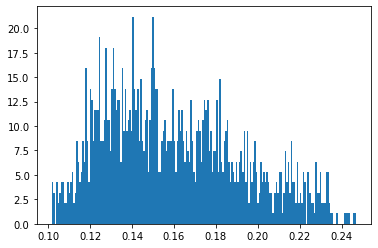

In [46]:
distribuicao = np.random.triangular(0.1, 0.13, 0.25, 1301)
h = plt.hist(distribuicao, bins=200,
             density=True)

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [47]:
chisquare(distribuicao)

Power_divergenceResult(statistic=8.738686756474511, pvalue=1.0)

Teste de Kolmogorov Smirnov

In [48]:
param = stats.triang.fit(distribuicao)
ks, p_value = stats.kstest(distribuicao, lambda distribuicao : stats.triang.cdf(distribuicao, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(distribuicao))

0.017615919359957766
0.807410191392929
Distribuição é a passada como entrada


Criação do Box-plot dos dados

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0ce6b99a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ce6c7100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0ce6b95e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ce6c7820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ce6c7bb0>],
 'means': []}

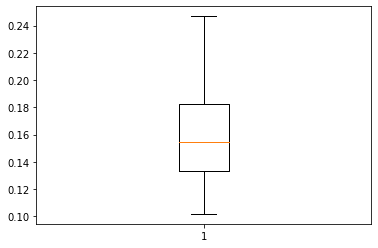

In [49]:
plt.boxplot(distribuicao)

Gráfico de dispersão dos dados aleatórios gerados

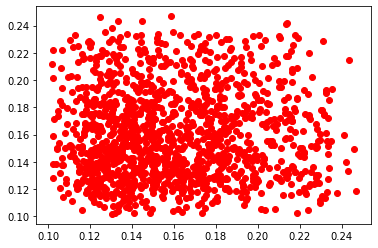

In [50]:
ey = []
j=1
while j <= 1300:
    ey.append(distribuicao[j])
    j+=1
distribuicao = np.resize(distribuicao, distribuicao.size - 1)
plt.scatter(distribuicao,ey,color = 'r')

In [51]:
x = np.array(distribuicao)
y = np.array(ey)
x = x.reshape(-1,1)

linreg = LinearRegression(fit_intercept = False)
obj = linreg.fit(x,y)
pred = linreg.predict(x)
r2 = r2_score(y,pred)
r2

-0.9303184573545678

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ti e a coluna da direita corresponde a T(i+1)

In [52]:
df6 = pd.DataFrame(distribuicao, ey)
df6.head()

,0
0.176737,0.130470
0.231384,0.176737
0.174682,0.231384
0.176258,0.174682
0.171654,0.176258


# Mesa de refeições

Geração dos números aleatórios com uma distribuição triangular e criação do histograma

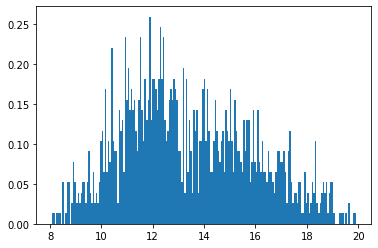

In [53]:
distribuicao = np.random.triangular(8, 12,20, 1301)
h = plt.hist(distribuicao, bins=200,
             density=True)

Teste Chi-quadrado para uma distribuição uniforme Conclusão: pelo Valor-p encontrado ser maior que o nível de significância de 5%, logo a distribuição não é uniforme

In [54]:
chisquare(distribuicao)

Power_divergenceResult(statistic=617.2844324635695, pvalue=1.0)

Teste de K-S

In [55]:
param = stats.triang.fit(distribuicao)
ks, p_value = stats.kstest(distribuicao, lambda distribuicao : stats.triang.cdf(distribuicao, *param))
print(ks)
print(p_value)
teste_hipoteses(ks,len(distribuicao))

0.02008118618389987
0.6627795865941654
Distribuição é a passada como entrada


Criação do Box-plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1f0cdfaa940>,
 'caps': [<matplotlib.lines.Line2D at 0x1f0ce3300a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f0cdfaa610>],
 'medians': [<matplotlib.lines.Line2D at 0x1f0ce3307c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f0ce330b50>],
 'means': []}

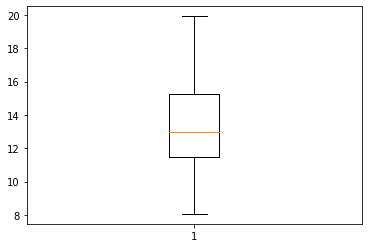

In [56]:
plt.boxplot(distribuicao)

Criação do diagrama de dispersão

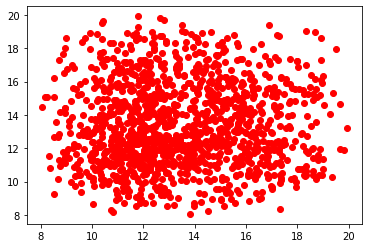

In [57]:
ey = []
j=1
while j <= 1300:
    ey.append(distribuicao[j])
    j+=1
distribuicao = np.resize(distribuicao, distribuicao.size - 1)
plt.scatter(distribuicao,ey,color = 'r')

Cálculo do R²

In [58]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(distribuicao, ey)
R2 = r_value**2
R2

0.0005271240622280565

Mostrando a parte inicial dos dados gerados, onde a coluna da esquerda corresponde a Ti e a coluna da direita corresponde a T(i+1)

In [59]:
df7 = pd.DataFrame(distribuicao, ey)
df7.head()

,0
12.550284,11.859574
12.391707,12.550284
8.691672,12.391707
12.766053,8.691672
11.591771,12.766053


# Cálculo do R2

In [60]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

Horário: 11-12h -> 150 pessoas

In [61]:
lam = 2.5
beta = 1/lam
x = np.linspace(0,2.5, 150) 
y = func(x, lam, 1, 0)
y_noise = np.random.exponential(scale = beta, size = 150)
y = y + y_noise 
popt, pcov = curve_fit(func, x, y)
residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.5923386889925171


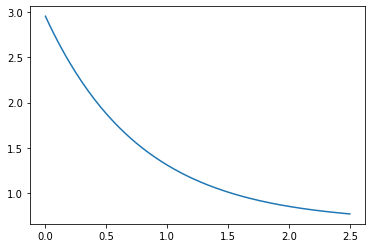

In [62]:
plt.plot(x, func(x, *popt))

Horário: 12-13h -> 750 pessoas

In [63]:
lam = 12.5
beta = 1/lam
x = np.linspace(0,6.67,750) 
y = func(x, lam, 1, 0)
y_noise = np.random.exponential(scale = beta, size = 750)
y = y + y_noise 
popt, pcov = curve_fit(func, x, y)
residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9992633799409453


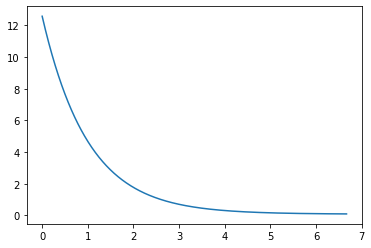

In [64]:
plt.plot(x, func(x, *popt))

Horário: 13-14h -> 400 pessoas

In [65]:
lam = 6.67
beta = 1/lam
x = np.linspace(0,6.67,400) 
y = func(x, lam, 1, 0)
y_noise = np.random.exponential(scale = beta, size = 400)
y = y + y_noise
popt, pcov = curve_fit(func, x, y)
residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

0.9917436705290594


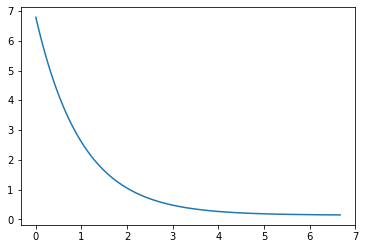

In [66]:
plt.plot(x, func(x, *popt))